In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, floor

In [3]:
folder='../datasets'
filename='gold-prices.csv'
fname=f"{folder}/{filename}"
import os.path
os.path.isfile(fname) 

True

In [4]:
import csv
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

time_series = []
with open(f"{folder}/{filename}", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for x in row:
            try:
                time_series.append(locale.atof((x)))
            except ValueError:
                print(x)
                pass

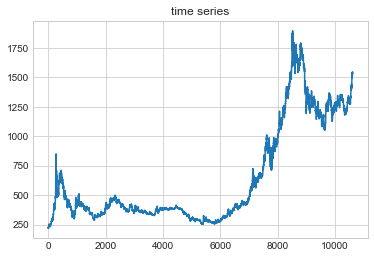

In [5]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

In [6]:
int(ceil(max(time_series))-floor(min(time_series)))

1679

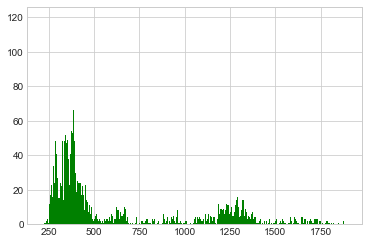

In [7]:
count, bins, ignored  = plt.hist(time_series, bins=int(ceil(max(time_series))-floor(min(time_series))), color='green')

In [8]:
import numpy as np


arrays = [np.array(time_series[:t]) for t in range(10,len(time_series))]

means = [ts.mean() for ts in arrays]
stds = [ts.std() for ts in arrays]
vars = [ts.var() for ts in arrays]

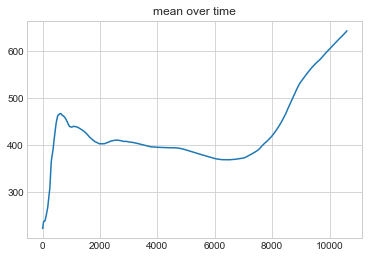

In [9]:
plt.title("mean over time")
plt.plot(means)
plt.show()

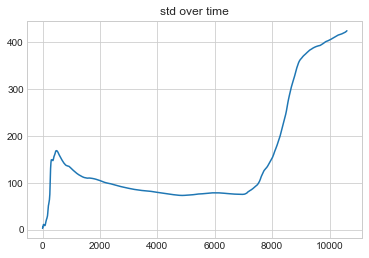

In [10]:
plt.title("std over time")
plt.plot(stds)
plt.show()

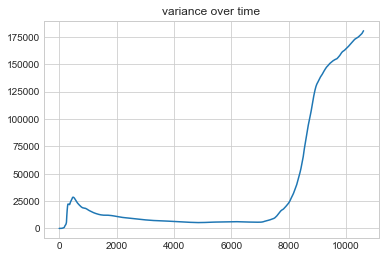

In [42]:
plt.title("variance over time")
plt.plot(vars)
plt.show()